In [1]:
# Data Collection

In [ ]:
import yfinance as yf
import pandas as pd

# Create ticker object
ticker = yf.Ticker("META")

# Fetch historical stock data
start_date = "2014-01-01"
end_date = "2023-04-05"
data = ticker.history(start=start_date, end=end_date)

# Save data to CSV
data.to_csv("meta_stock_data.csv")

In [ ]:
# Data Cleaning , Analysis and Exploratiom

In [2]:
import pandas as pd

# Load the stock data from the CSV file
data = pd.read_csv("meta_stock_data.csv")

# Describe the data
description = data.describe()
print("Data Description:")
print(description)

# Check for null values
null_values = data.isnull().sum()
print("\nNull Values:")
print(null_values)

# Display the head of the data
head_data = data.head()
print("\nHead of the Data:")
print(head_data)


Data Description:
              Open         High          Low        Close        Volume  \
count  2330.000000  2330.000000  2330.000000  2330.000000  2.330000e+03   
mean    168.944768   171.100330   166.839481   169.014330  2.654096e+07   
std      76.671336    77.670417    75.707457    76.685165  1.827627e+07   
min      54.020000    54.939999    51.849998    53.529999  5.913100e+06   
25%     111.400000   112.735003   110.139999   112.057503  1.554585e+07   
50%     164.610001   166.750000   162.150002   164.659996  2.140400e+07   
75%     200.259998   203.327499   198.145000   200.717503  3.072715e+07   
max     381.679993   384.329987   378.809998   382.179993  2.323166e+08   

       Dividends  Stock Splits  
count     2330.0        2330.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0           0.0  

Null Val

In [ ]:
# Data Analysis and Exploration

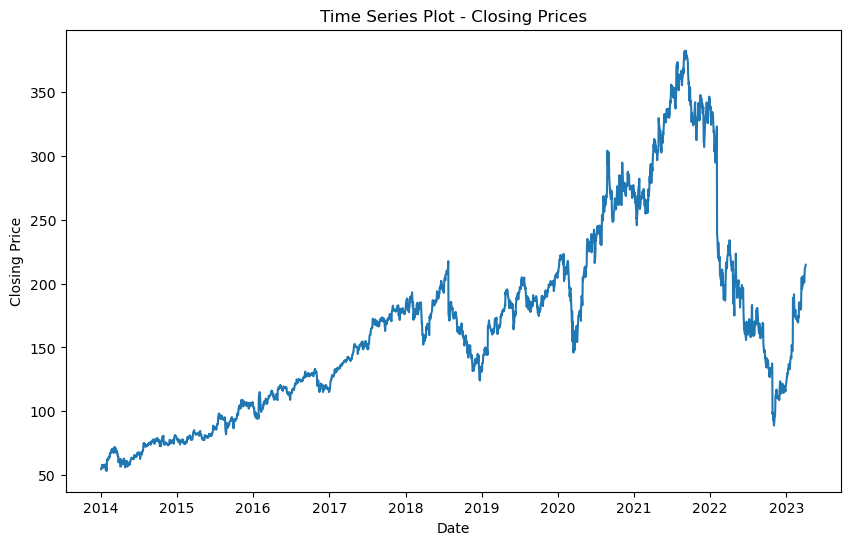

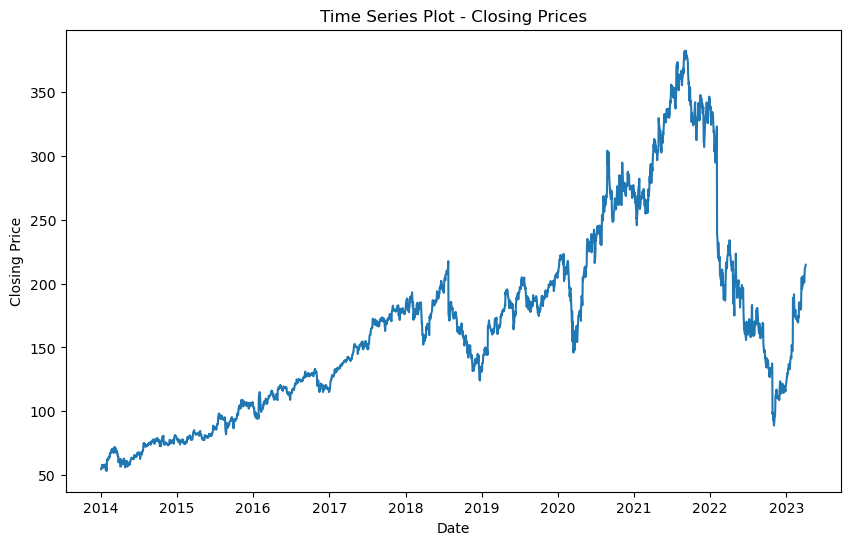

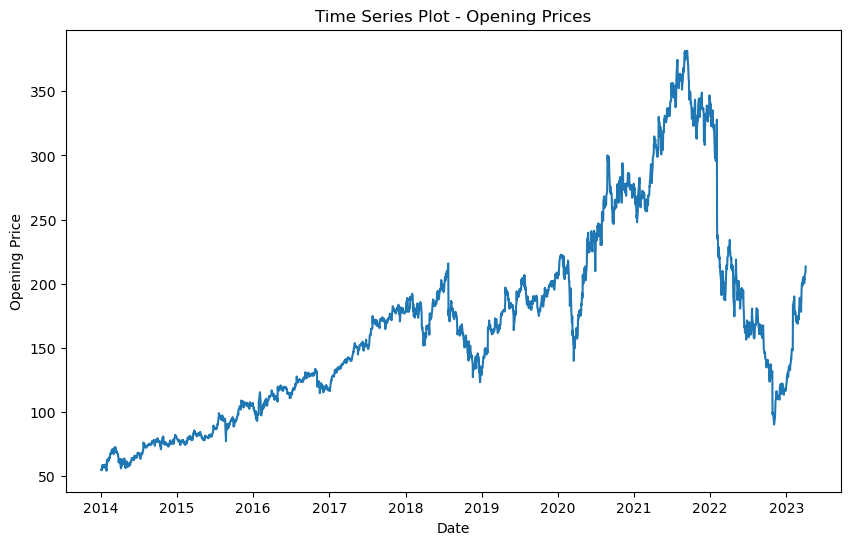

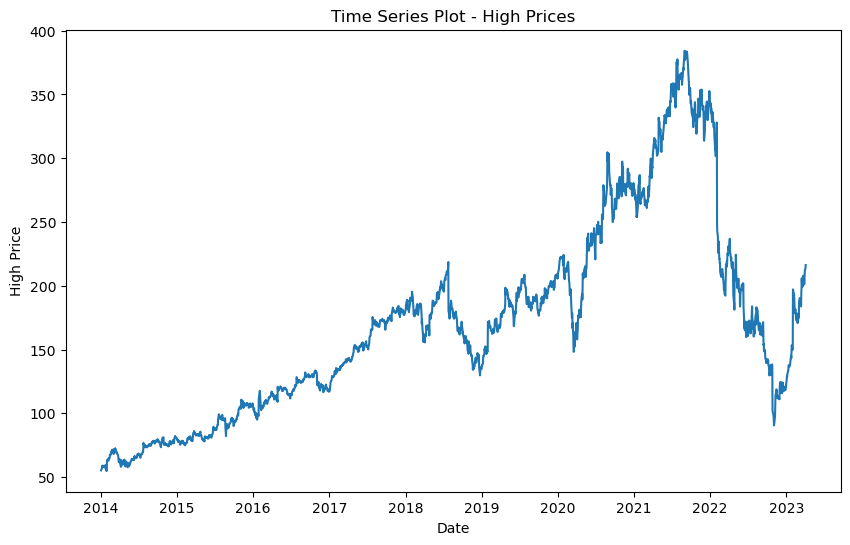

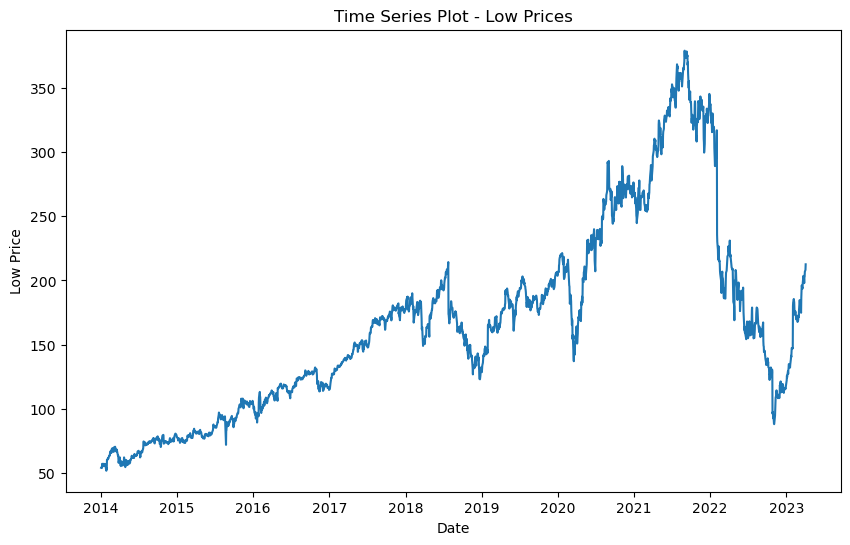

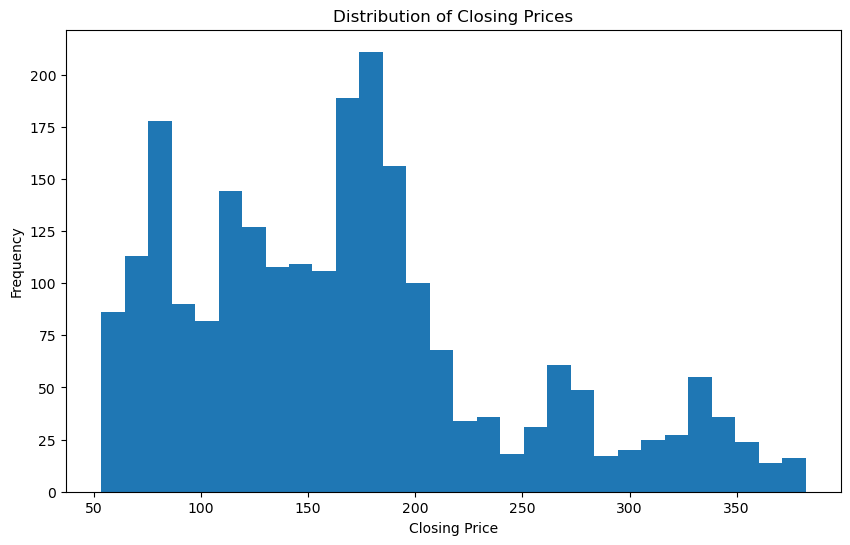

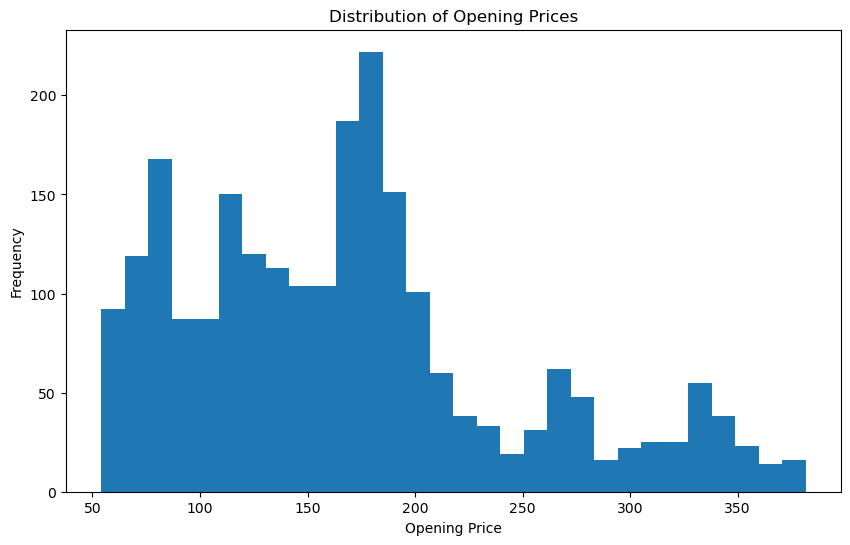

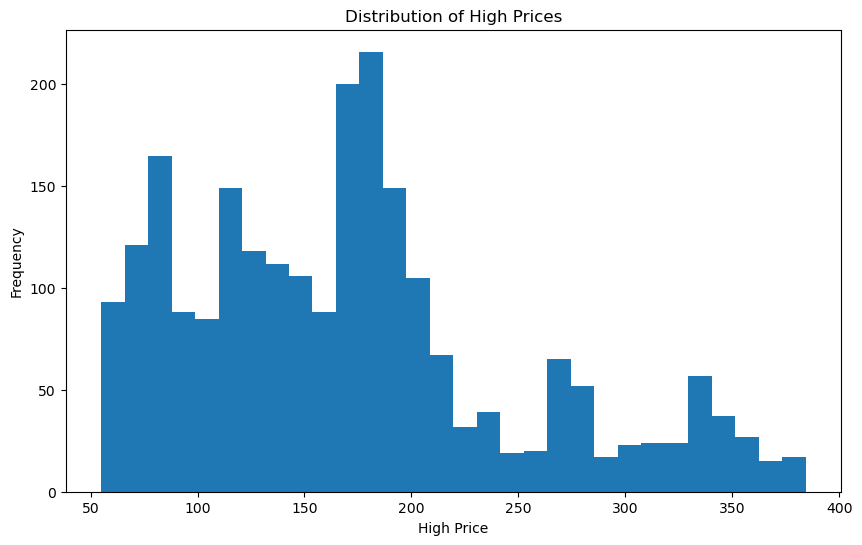

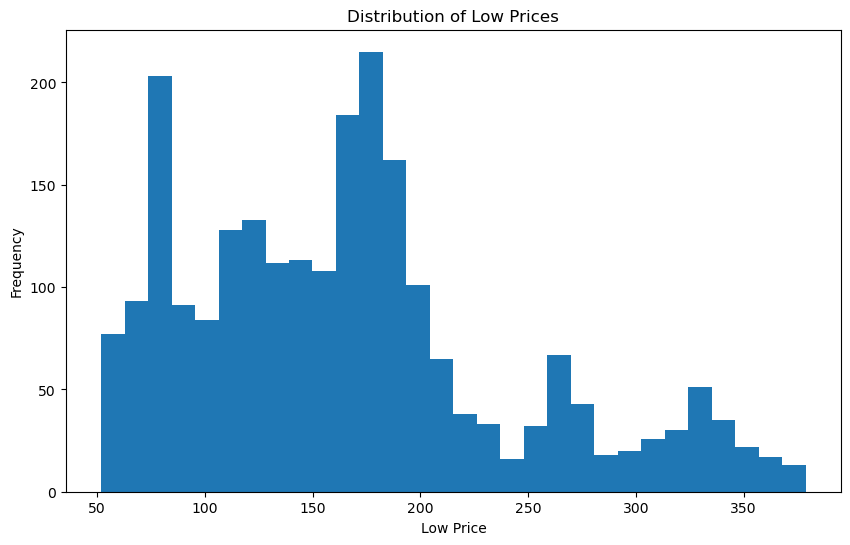

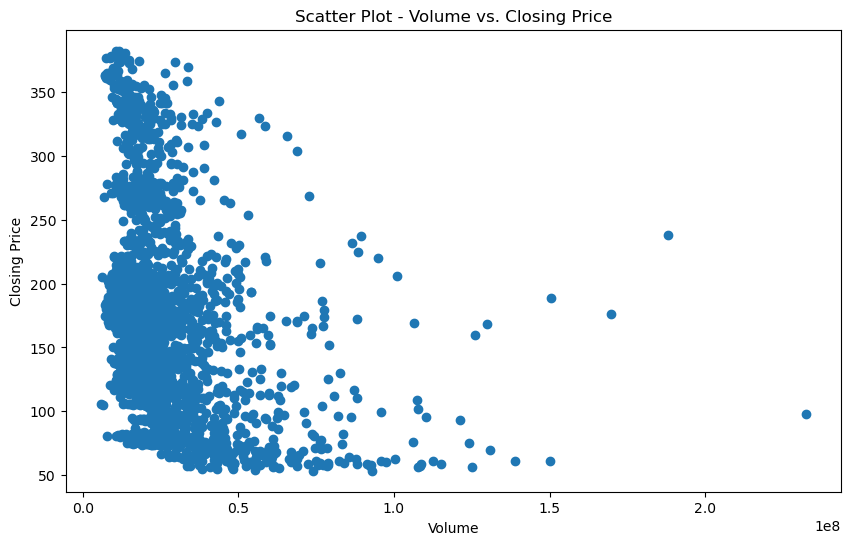

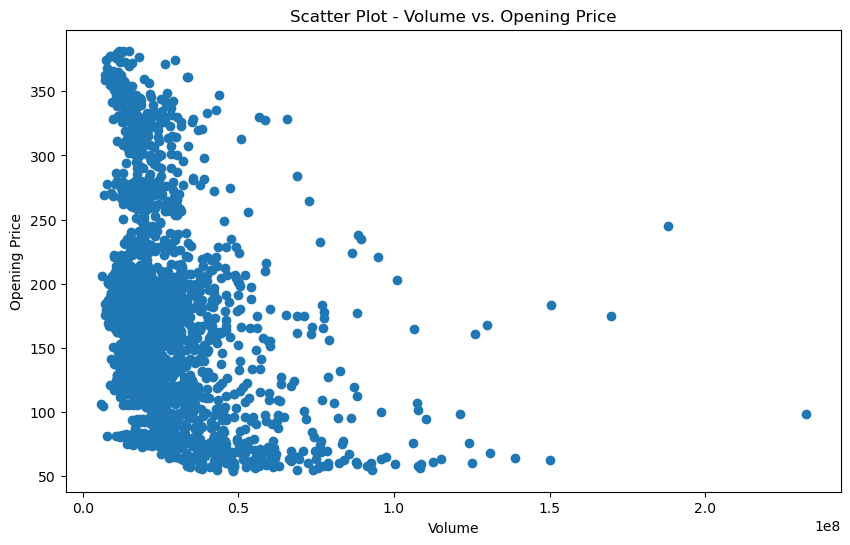

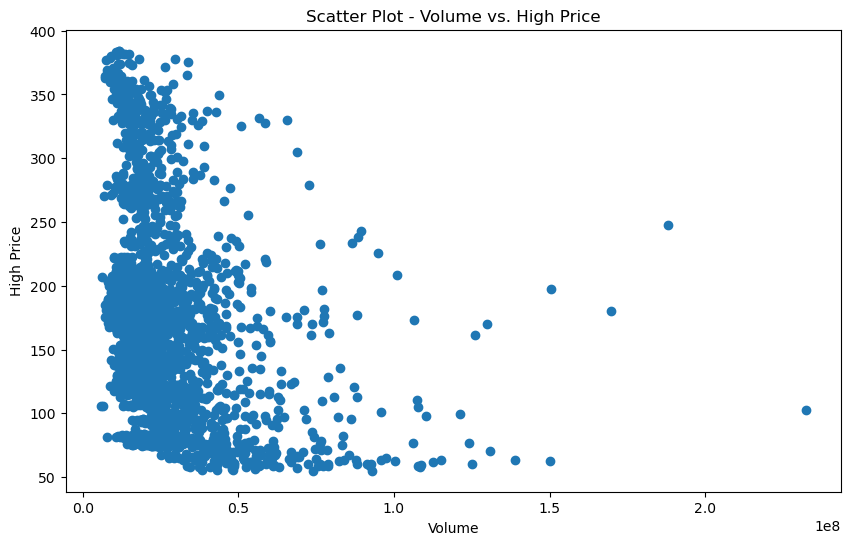

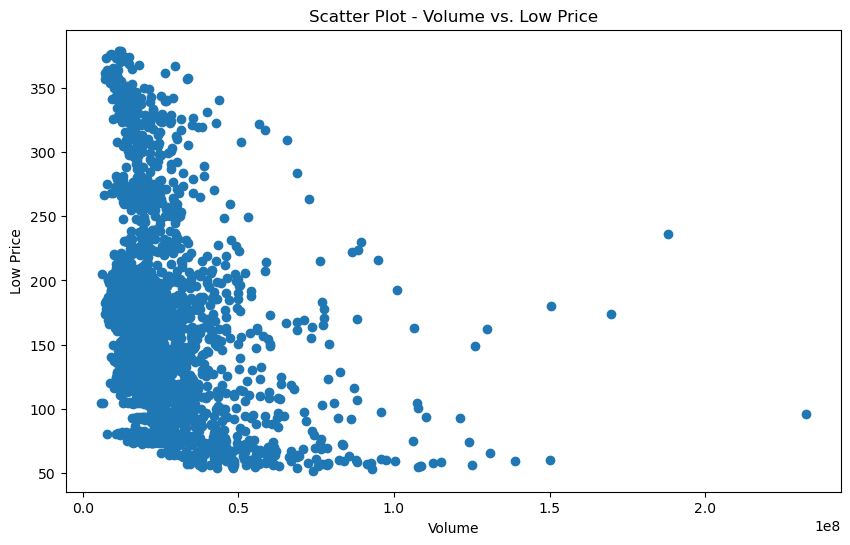

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock data from the CSV file
data = pd.read_csv("meta_stock_data.csv", parse_dates=['Date'])

# Select relevant features
selected_features = ["Date", "Close", "Open", "High", "Low", "Volume"]
data = data[selected_features]

# Set the date column as the index
data.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'])
plt.title('Time Series Plot - Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Plot the time series for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'])
plt.title('Time Series Plot - Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Plot the time series for Opening Prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Open'])
plt.title('Time Series Plot - Opening Prices')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.show()

# Plot the time series for High Prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['High'])
plt.title('Time Series Plot - High Prices')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

# Plot the time series for Low Prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Low'])
plt.title('Time Series Plot - Low Prices')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.show()

# Histogram for Closing Prices
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=30)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Histogram for Opening Prices
plt.figure(figsize=(10, 6))
plt.hist(data['Open'], bins=30)
plt.title('Distribution of Opening Prices')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')
plt.show()

# Histogram for High Prices
plt.figure(figsize=(10, 6))
plt.hist(data['High'], bins=30)
plt.title('Distribution of High Prices')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.show()

# Histogram for Low Prices
plt.figure(figsize=(10, 6))
plt.hist(data['Low'], bins=30)
plt.title('Distribution of Low Prices')
plt.xlabel('Low Price')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot - Volume vs. Closing Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'])
plt.title('Scatter Plot - Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

# Scatter Plot - Volume vs. Opening Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Open'])
plt.title('Scatter Plot - Volume vs. Opening Price')
plt.xlabel('Volume')
plt.ylabel('Opening Price')
plt.show()

# Scatter Plot - Volume vs. High Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['High'])
plt.title('Scatter Plot - Volume vs. High Price')
plt.xlabel('Volume')
plt.ylabel('High Price')
plt.show()

# Scatter Plot - Volume vs. Low Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Low'])
plt.title('Scatter Plot - Volume vs. Low Price')
plt.xlabel('Volume')
plt.ylabel('Low Price')
plt.show()


In [ ]:
# Data Modelling 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the stock data from the CSV file
data = pd.read_csv("meta_stock_data.csv")

# Handle missing values (optional)
data = data.dropna()  # Drop rows with missing values

# Select relevant features
selected_features = ["Open", "High", "Low", "Close"]
data = data[selected_features]

# Perform data scaling for features
scaler = MinMaxScaler()
data[selected_features[:-1]] = scaler.fit_transform(data[selected_features[:-1]])

# Perform data scaling for target variable (Close)
target_scaler = MinMaxScaler()
data[["Close"]] = target_scaler.fit_transform(data[["Close"]])

# Split the dataset into train and test sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Reshape the data for LSTM input
def reshape_data(data, time_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps][selected_features[:-1]])  # Input features (Open, High, Low)
        y.append(data.iloc[i + time_steps]["Close"])  # Target variable (Close)
    return np.array(X), np.array(y)

time_steps = 10
X_train, y_train = reshape_data(train_data, time_steps)
X_test, y_test = reshape_data(test_data, time_steps)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predicted_prices_scaled = model.predict(X_test)
predicted_prices = target_scaler.inverse_transform(predicted_prices_scaled)

# Convert the test data back to the original scale for evaluation
y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Compare the predicted prices with the actual prices
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted_prices.flatten()})
print(comparison)

Epoch 1/50
58/58 [==============================] - 12s 20ms/step - loss: 0.0075
Epoch 2/50
58/58 [==============================] - 1s 21ms/step - loss: 4.2646e-04
Epoch 3/50
58/58 [==============================] - 1s 21ms/step - loss: 4.3003e-04
Epoch 4/50
58/58 [==============================] - 1s 21ms/step - loss: 4.2651e-04
Epoch 5/50
58/58 [==============================] - 1s 21ms/step - loss: 4.4455e-04
Epoch 6/50
58/58 [==============================] - 1s 21ms/step - loss: 4.0728e-04
Epoch 7/50
58/58 [==============================] - 1s 21ms/step - loss: 4.1863e-04
Epoch 8/50
58/58 [==============================] - 1s 21ms/step - loss: 4.0927e-04
Epoch 9/50
58/58 [==============================] - 1s 21ms/step - loss: 4.0994e-04
Epoch 10/50
58/58 [==============================] - 1s 21ms/step - loss: 3.9426e-04
Epoch 11/50
58/58 [==============================] - 1s 20ms/step - loss: 4.0899e-04
Epoch 12/50
58/58 [==============================] - 1s 21ms/step - loss: 3.9

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted_prices)
r2 = r2_score(y_test, predicted_prices)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 80.91682014928547
Root Mean Squared Error (RMSE): 8.995377710206808
Mean Absolute Error (MAE): 6.385896264461049
R-squared (R2): 0.9897836198664092


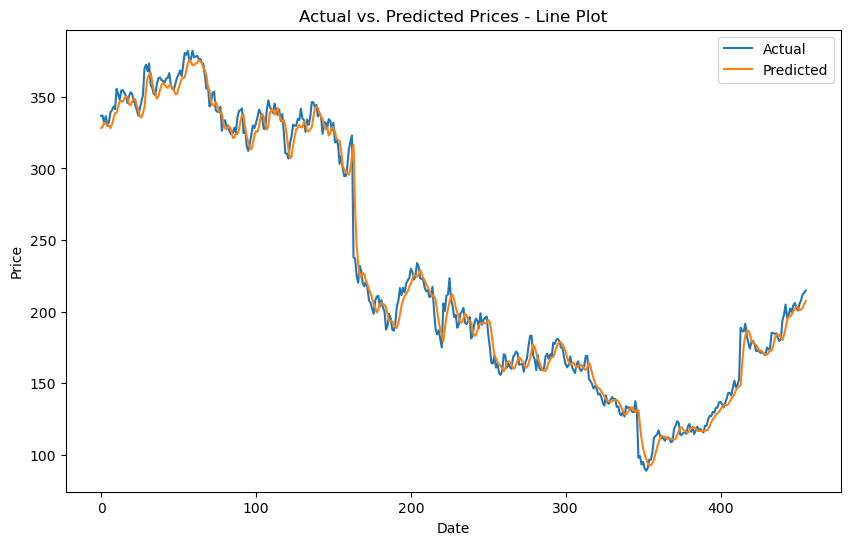

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock data from the CSV file
data = pd.read_csv("meta_stock_data.csv", parse_dates=['Date'])

# Select relevant features
selected_features = ["Date", "Close"]
data = data[selected_features]

# Set the date column as the index
data.set_index('Date', inplace=True)

# Plot the line plot (Actual vs. Predicted)
plt.figure(figsize=(10, 6))
plt.plot(comparison.index, comparison['Actual'], label='Actual')
plt.plot(comparison.index, comparison['Predicted'], label='Predicted')
plt.title('Actual vs. Predicted Prices - Line Plot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

